In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

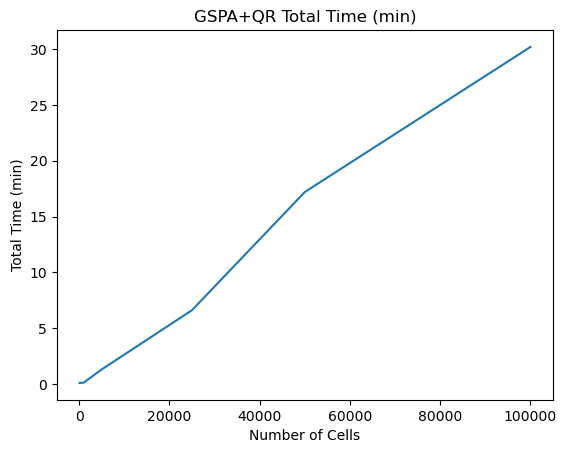

<Figure size 640x480 with 0 Axes>

In [5]:
df = pd.read_csv('results/runtime_GSPA_QR_fast.out', header=None)
times = []
for i in range(6):
    subset = df.iloc[i*5:(i+1)*5]
    run = subset.iloc[0][0].split(' ')
    run[0] = int(run[0])
    run[1] = run[1] == 'True'
    subset = subset.iloc[1:]
    seconds_to_run = [float(x[-1]) for x in subset[0].str.split(' ')]
    times.append([run[0], seconds_to_run[0], seconds_to_run[1], seconds_to_run[2], seconds_to_run[3], sum(seconds_to_run) / 60])
    
times_qr = pd.DataFrame(np.array(times))
times_qr.columns = ['Number of Cells', 'Condensation', 'Graph construction Time (s)', 'Wavelets construction Time (s)', 'Projection & Autoencoder Time (s)', 'Total Time (min)']

for column in ['Total Time (min)']:
    g=sns.lineplot(times_qr, x='Number of Cells', y=column, errorbar='sd')
    plt.title('GSPA+QR ' + column)
    plt.show(); plt.clf()

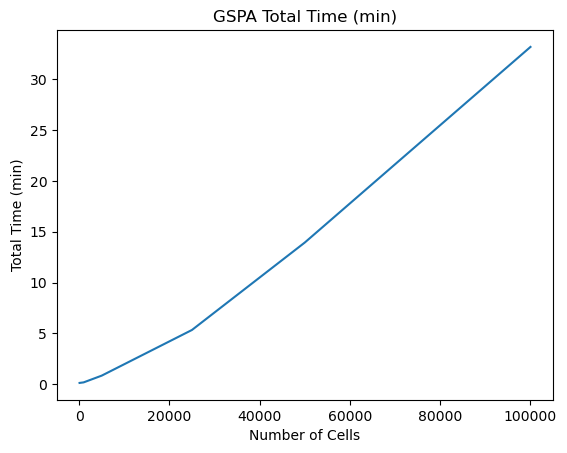

<Figure size 640x480 with 0 Axes>

In [6]:
df = pd.read_csv('results/runtime_GSPA_fast.out', header=None)
times = []
for i in range(6):
    subset = df.iloc[i*5:(i+1)*5]
    run = subset.iloc[0][0].split(' ')
    run[0] = int(run[0])
    run[1] = run[1] == 'True'
    subset = subset.iloc[1:]
    seconds_to_run = [float(x[-1]) for x in subset[0].str.split(' ')]
    times.append([run[0], seconds_to_run[0], seconds_to_run[1], seconds_to_run[2], seconds_to_run[3], sum(seconds_to_run) / 60])
    
times = pd.DataFrame(np.array(times))
times.columns = ['Number of Cells', 'Condensation', 'Graph construction Time (s)', 'Wavelets construction Time (s)', 'Projection & Autoencoder Time (s)', 'Total Time (min)']

for column in ['Total Time (min)']:
    g=sns.lineplot(times, x='Number of Cells', y=column, errorbar='sd')
    plt.title('GSPA ' + column)
    plt.show(); plt.clf()

In [7]:
times_qr

,Number of Cells,Condensation,Graph construction Time (s),Wavelets construction Time (s),Projection & Autoencoder Time (s),Total Time (min)
0,100.0,0.000000,0.200582,0.092683,6.579295,0.114543
1,1000.0,0.000000,1.011697,0.854919,6.369025,0.137261
2,5000.0,0.000000,5.458617,53.984101,19.884002,1.322112
3,25000.0,132.482929,13.130586,176.097606,75.492526,6.620061
4,50000.0,584.792112,16.374358,268.897901,161.731506,17.196598
5,100000.0,1635.415668,7.207551,65.566544,102.798334,30.183135


In [8]:
times

,Number of Cells,Condensation,Graph construction Time (s),Wavelets construction Time (s),Projection & Autoencoder Time (s),Total Time (min)
0,100.0,0.000000,0.291354,0.013609,7.822752,0.135462
1,1000.0,0.000000,1.364311,0.320988,9.660774,0.189101
2,5000.0,0.000000,9.170947,9.764067,32.144709,0.851329
3,25000.0,138.444150,11.989311,41.605064,128.458544,5.341618
4,50000.0,549.119802,16.301737,69.652883,201.252648,13.938784
5,100000.0,1853.394922,7.273038,20.903323,108.562955,33.168904


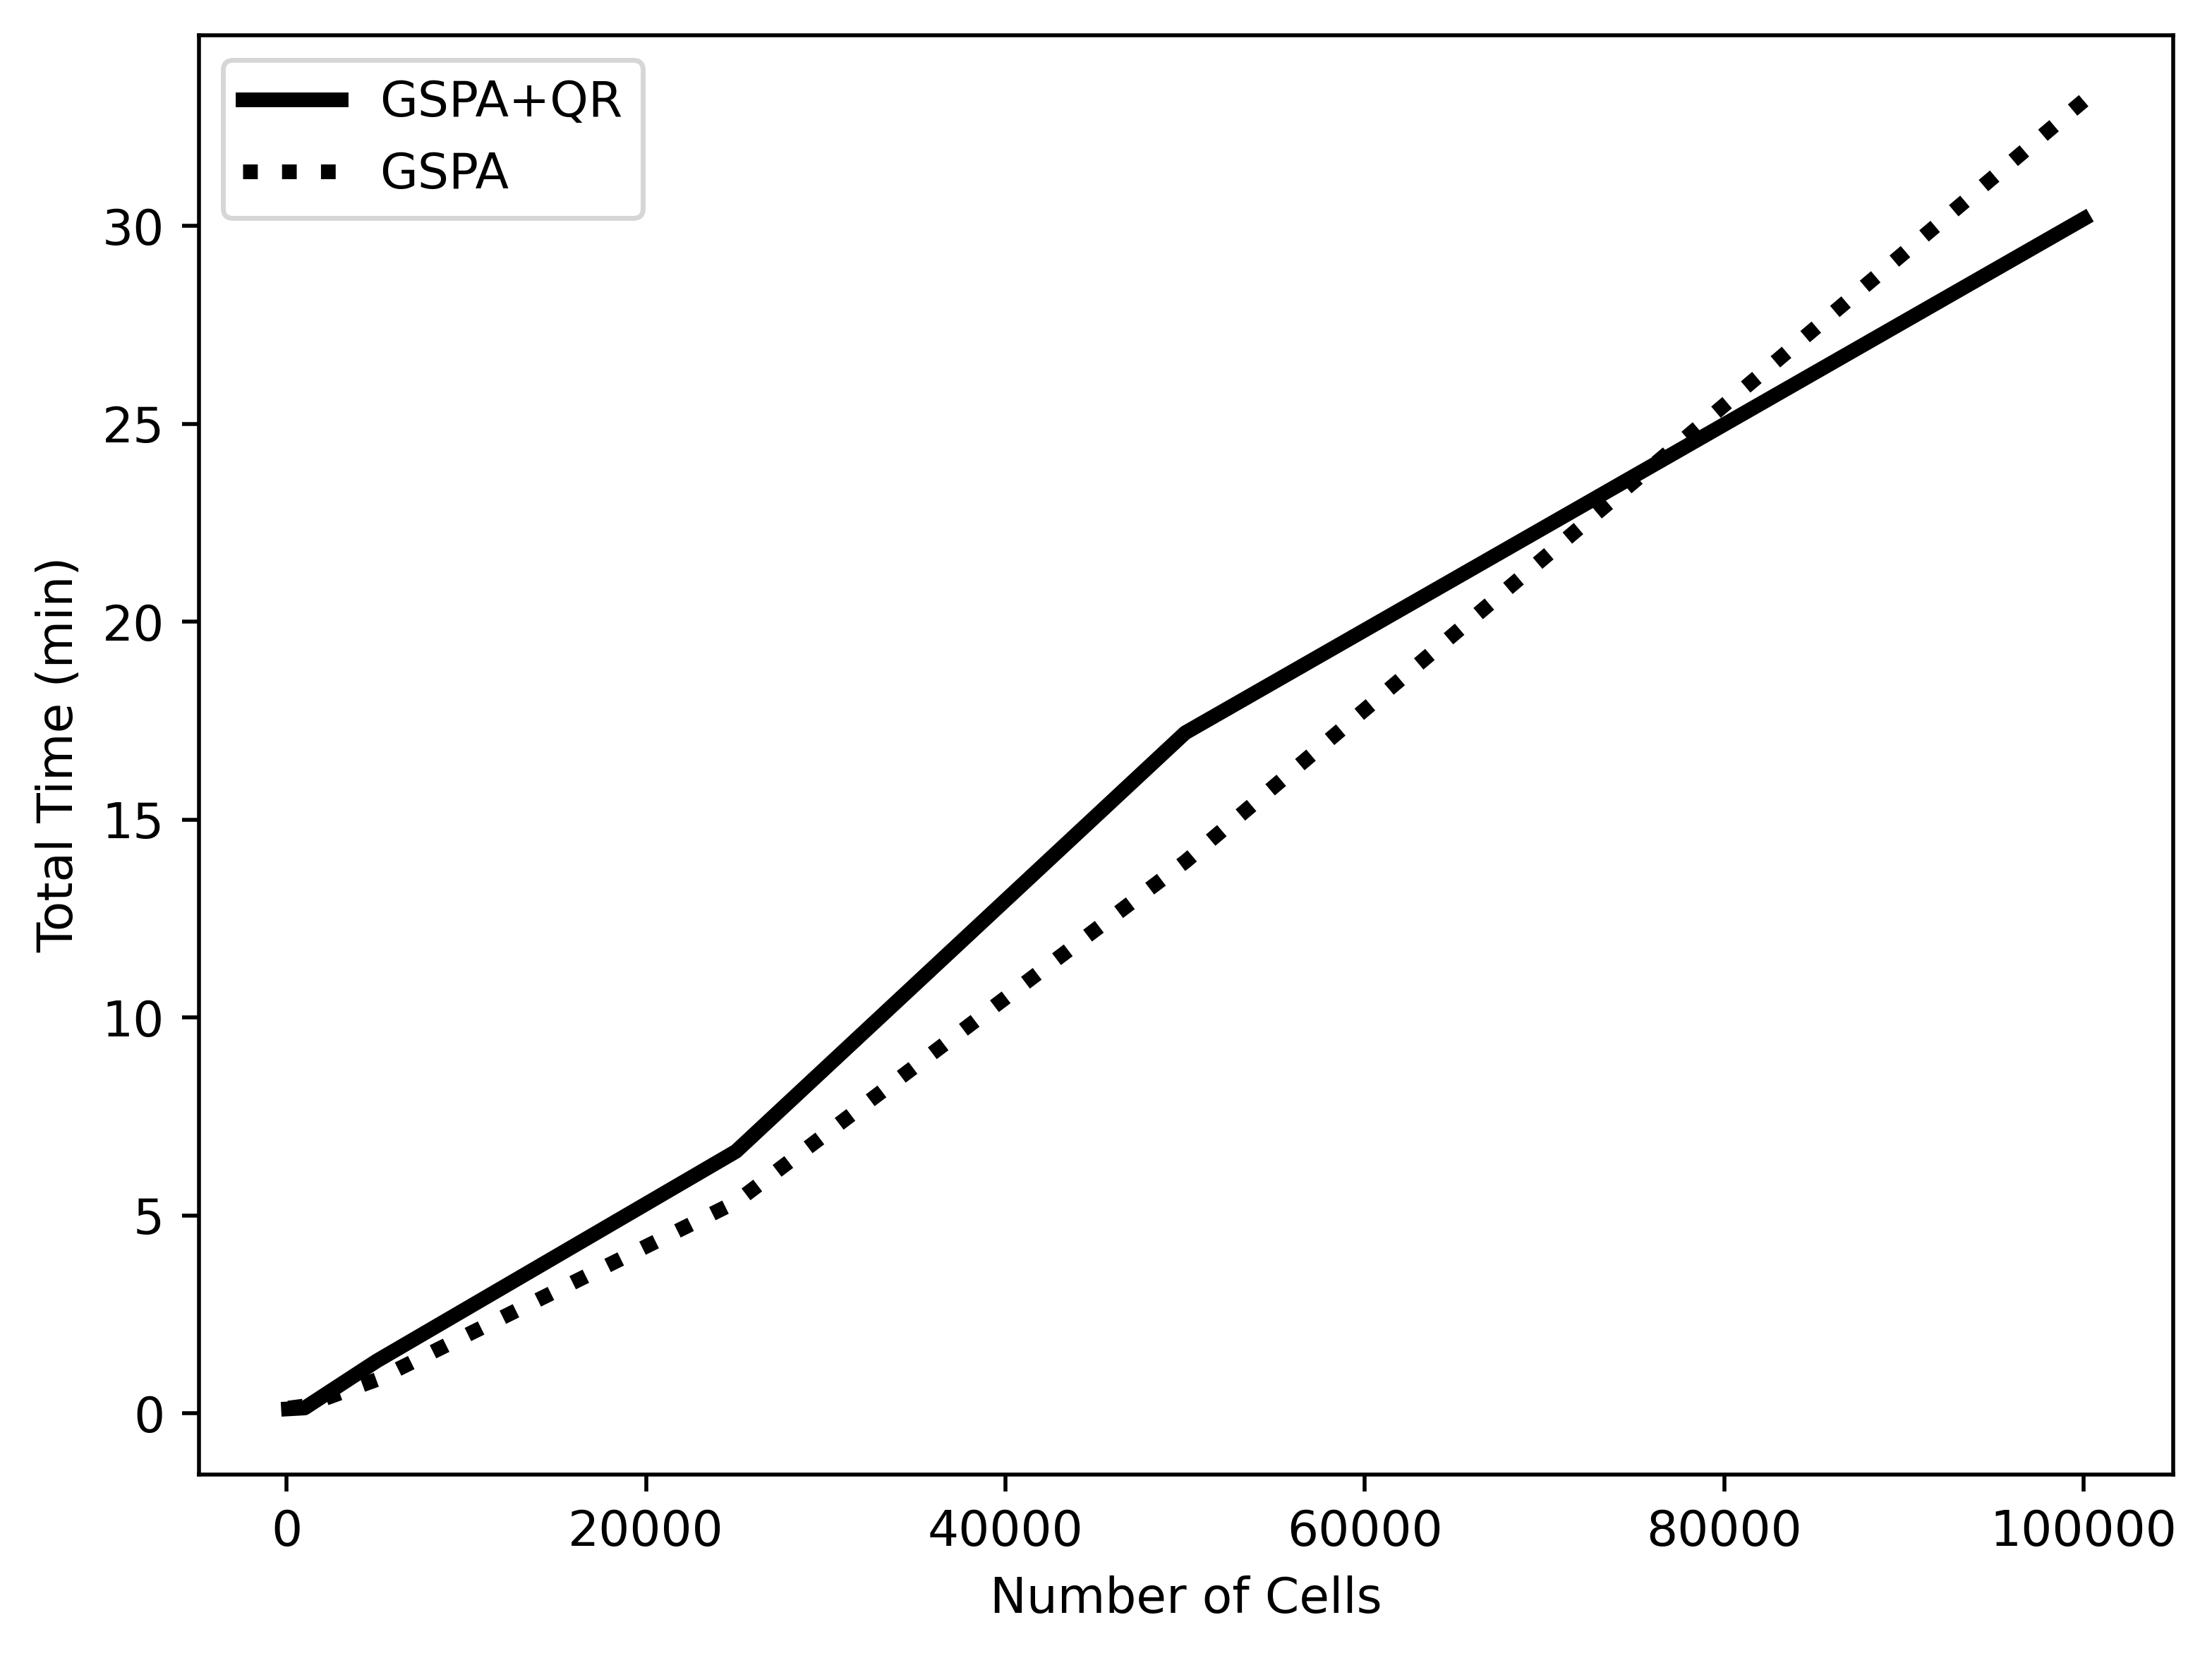

In [9]:
fig, ax = plt.subplots(dpi=500)
sns.lineplot(times_qr, x='Number of Cells', y=column, errorbar='sd', label='GSPA+QR', c='black', linewidth=3)
sns.lineplot(times, x='Number of Cells', y=column, errorbar='sd', label='GSPA', c='black', linewidth=3, linestyle='dotted')
plt.tight_layout()
fig.savefig('figures/runtime.png', dpi=500)